# Code to simulate and visualise 1D system of Delta Hes
Based on these equations: 

$$\frac{dH_i}{dt} = \beta_H m_{h,i}(t-T_p) - \gamma_H H_i(t)$$

$$\frac{dm_{H,i}}{dt} = \beta_m(w_H \frac{p_H^l}{p_H^l + H_i(t-T_m)^l} + w_D \frac{<D(t-T_m)>_i^n}{p_D^n + <D(t-T_m)>_i^n}) - \gamma_m m_{H,i}(t)$$

$$\frac{dD_i}{dt} = \beta_D m_{D,i}(t-T_p) - \gamma_D D_i(t)$$

$$\frac{dm_{D,i}}{dt} = \beta_m \frac{p_H^l}{p_H^l + H_i(t-T_m)^l} - \gamma_m m_{H,i}(t)$$


This gave me the following non-dimensionalised equations: 

$$\frac{d h_i}{dt} = m_{h,i}(t) - \gamma_hh_i(t)$$

$$\frac{dm_{h,i}}{dt} = w_H \frac{p_h^l}{p_h^l + h_i(t-\tau_h)^l} + w_D \frac{<d(t-\tau_d)>_i^n}{p_d^n+ <d(t-\tau_d)>_i^n}) - \gamma_m m_{h,i}(t)$$
    
$$\frac{d d_i}{dt} =  m_{d,i}(t) - \gamma_dd_i(t)$$

$$\frac{dm_{d,i}}{dt} = \frac{p_h^l}{p_h^l + h_i(t-\tau_h)^l} -\gamma_m m_{h,i}(t)$$


In [2]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm
import visualisation as vis
from delta_hes_model import *
from scipy.signal import find_peaks

plt.rcParams['text.usetex'] = True

## Parameters

In [18]:
#set the lattice of the cells 
P = 2
Q = 1

lattice = get_lattice(P, Q)

# #set first cell to have no coupling with the rest of the cells
# lattice.connectivity[:,0] = np.zeros(P*Q)

# # set initial parameters of the reactions 
gamma_h = 0.03
gamma_d = 0.03
gamma_m = 0.03
p_h = 100
p_d = 50
T_h = 14.2
T_coupling = 126
w_h = 1
w_coupling = 0.5
l = 5
n = 3

params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, T_h, T_coupling, w_h, w_coupling, l, n, lattice, grad_hes = True, grad_coup = False, grad_hes_strength = 1.2, grad_coup_strength = 0)
print(params)

namespace(gamma_h=0.03, gamma_d=0.03, gamma_m=0.03, p_h=100, p_d=50, T_h=array([14.2, 15.4]), T_coupling=array([126., 126.]), w_h=1, w_coupling=0.5, l=5, n=3, grad_hes=True, grad_coup=False, grad_hes_strength=1.2, grad_coup_strength=0)


## Run simulation

In [19]:
num_tsteps = 40000
dt = 0.2
h, m_h, d, m_d = simulate(num_tsteps, dt, lattice, params, coupling_type= 'Delta', initial_type='uniform')

100%|██████████| 39999/39999 [00:05<00:00, 6790.11it/s]



## Plot

In [ ]:
plt.figure()
plt.plot(h[:,1,0], label = 'h')
plt.plot(h[:,0,0], label = 'h cell 2')
# plt.plot(m_h[:,10,0], label = 'm_h')
# plt.plot(d[:,10,0], label = 'd')
# plt.plot(m_d[:,10,0], label = 'm_d')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

## Animate

KeyboardInterrupt: 

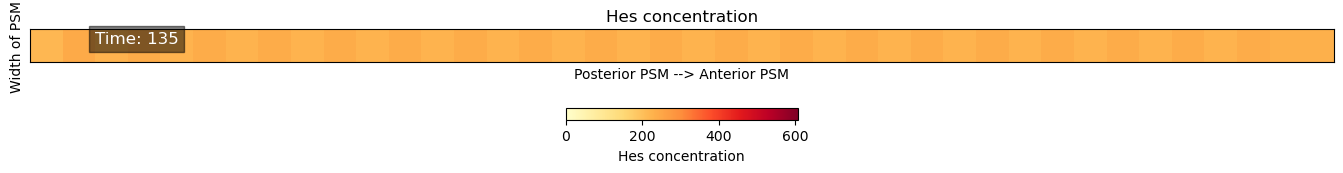

In [139]:
vis.animate_2D(h[::5,:,:], interval=5, plot_save=False, filename='1D_unstable_travelling_wave.gif', title = 'Hes concentration')